## Import the relevant libraries

In [ ]:
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #nice graphs
from mpl_toolkits.mplot3d import Axes3D #nice 3D graphs

## Generate random input data to train on

In [2]:
observations = 1000 #contains the size of the dataset we want to generate

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1)) 

inputs = np.column_stack((xs,zs))

print(inputs.shape)

(1000, 2)


## Create the targets we will aim at

In [3]:
# targets = f(x,z) = 2*x - 3*z + 5 + noise
# w1 = 2, w2 = -3, b = 5
noise = np.random.uniform(-1,1,size=(observations,1)) 

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


## Plot the training data

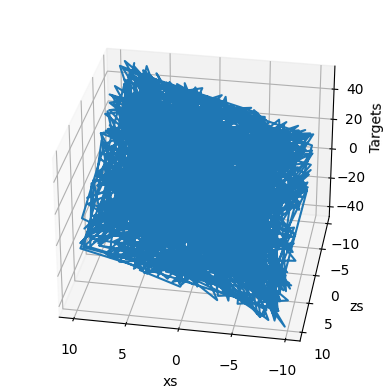

In [4]:
targets = targets.reshape(observations,1)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Initialize variables

In [5]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range, size = (2,1))
biases = np.random.uniform(-init_range, init_range, size = 1)

print(weights)
print(biases)

[[-0.01445126]
 [ 0.03950094]]
[0.03751641]


### Set a learning rate

In [6]:
learning_rate = 0.02

## Train the model

In [7]:
#Game plan for each iteration:
    #Calculate outputs
    #Compare outputs to target through the loss
    #print the loss
    #Adjust weights and biases

In [8]:
for i in range(100):
    # y = xw + b
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)

244.6913048162479
36.318315743767485
13.844296152580133
11.042108112562874
10.367425941948637
9.938908531751565
9.551449061829434
9.18192415122195
8.827236045552363
8.486532724431338
8.159233794516233
7.844808585704764
7.542750356402019
7.252572645092577
6.973808163701915
6.7060080080644715
6.448740930780799
6.201592646275177
5.964165163601418
5.736076145538487
5.51695829289967
5.306458753058604
5.10423855173919
4.909972047154237
4.72334640561388
4.544061097759284
4.371827414610411
4.2063680026485235
4.047416417184786
3.894716693295668
3.7480229336342816
3.6070989124538797
3.471717695205806
3.3416612730994046
3.2167202120353435
3.0966933153470526
2.9813872998071744
2.870616484377274
2.7642024911996015
2.6619739583494124
2.5637662638852716
2.4694212607529633
2.378787022116143
2.291717596703582
2.208072773779083
2.1277178573555626
2.05052344928969
1.976365240907856
1.9051238128278503
1.8366844426539328
1.7709369202356284
1.7077753701927116
1.6470980814206369
1.5888073433018284
1.53280928

### Print Weights and biases and see if we have worked correctly

In [9]:
print(weights, biases)

[[ 2.00815242]
 [-3.00227305]] [4.33495547]


### Plot last outputs vs targets
Since they are the last ones at the end of the training, they represent the final model accuracy.
The closer this plot is to a 45 degree line, the closer target and output values are.

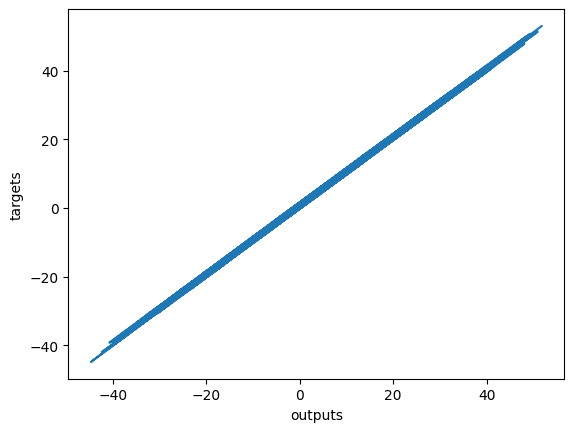

In [12]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Minimal Example with Tensorflow 2.0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
observations = 1000 #contains the size of the dataset we want to generate

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1)) 

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,size=(observations,1)) 

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# For each project there will be a dataset, perhaps xlsx or csv files. However, tensorflow doesn't work well woth them. Its 
# tansor based thats why it likes tensors. So we want a format which can store information in tensors. One solution to this 
# problem is .npz files. That's numPy's file type. Stores n-dimensional arrays. Tensor can be represented as a multi dimensional
# array. 

## Solving with Tensorflow

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2 # x's and z's
output_size = 1

# When we are employing tensorFlow we must actually BUILD the model
# output = np.dot(inputs,weights) + bias (This is what tf.keras.layers.Dense() Does.)

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

# model.compile(optimizer,loss) configures the model for training
# Epoch is iteration over the full dataset
# verbose = 0, stands for 'silent' 
# verbose = 1, stands for 'progress bar'
# verbose = 2, stands for 'one line per epoch'

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 31.7332 - 500ms/epoch - 16ms/step
Epoch 2/100
32/32 - 0s - loss: 4.4185 - 46ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 1.4624 - 43ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.6487 - 47ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.4409 - 46ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3775 - 44ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3628 - 47ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3656 - 46ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3542 - 43ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3566 - 40ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3562 - 51ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3527 - 41ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.3557 - 50ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 0.3559 - 40ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3617 - 41ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3542 - 42ms/epoch - 1ms/ste

## Extract the weights and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.9941113],
        [-2.9730544]], dtype=float32),
 array([5.011937], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9941113],
       [-2.9730544]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([5.011937], dtype=float32)

## Extract the outputs (make predictions)

In [8]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[-21.1],
       [ -4.1],
       [-18.6],
       [ -7.9],
       [ -9.7],
       [-12.9],
       [ 13.8],
       [ 28. ],
       [  3.9],
       [-11.1],
       [ 12.3],
       [  8.4],
       [ 11. ],
       [  4.5],
       [ 46.6],
       [ 45.3],
       [ -0. ],
       [-20. ],
       [  9.8],
       [-20.7],
       [ 43.6],
       [ -7.9],
       [ 24.7],
       [ 12.8],
       [ 17.9],
       [ 49.8],
       [ 25.2],
       [ -6.3],
       [ -8.6],
       [  7.4],
       [-29.5],
       [ -0.6],
       [  4.4],
       [ -1.3],
       [ 21.8],
       [ 20.3],
       [ -6.1],
       [ 21.3],
       [-36.6],
       [ -5.2],
       [  5.3],
       [ -4.8],
       [ 32.4],
       [ 10.3],
       [ 42.3],
       [ -2.8],
       [-34.4],
       [ 16.4],
       [  0.1],
       [ 36.6],
       [  8.2],
       [-12.2],
       [ 10.8],
       [ 33.1],
       [  9. ],
       [  6.9],
       [ 25.7],
       [  3.2],
       [-39.4],
       [ -5.6],
       [ 37.7],
       [ 30.7],
       [

In [9]:
training_data['targets'].round(1)

array([[-22.1],
       [ -3.5],
       [-18.1],
       [ -7.8],
       [ -9. ],
       [-13. ],
       [ 14.8],
       [ 27.8],
       [  3.8],
       [-11.8],
       [ 12.4],
       [  8.4],
       [ 11.4],
       [  4.6],
       [ 46. ],
       [ 45.8],
       [ -0.9],
       [-20.9],
       [  9.1],
       [-20.9],
       [ 42.9],
       [ -8.6],
       [ 24. ],
       [ 13.8],
       [ 18.8],
       [ 50.5],
       [ 26.2],
       [ -6.4],
       [ -8.6],
       [  6.6],
       [-30.3],
       [ -0.2],
       [  3.3],
       [ -1.9],
       [ 22.1],
       [ 19.8],
       [ -6.1],
       [ 21.6],
       [-36.2],
       [ -6.2],
       [  4.9],
       [ -5.3],
       [ 32.7],
       [ 11. ],
       [ 42.4],
       [ -2.9],
       [-34.7],
       [ 15.8],
       [  1.1],
       [ 36.7],
       [  9.2],
       [-12.4],
       [ 11.5],
       [ 33.4],
       [  8.5],
       [  7.9],
       [ 25.8],
       [  2.5],
       [-39.2],
       [ -5.2],
       [ 38.5],
       [ 31.1],
       [

## Plotting the data

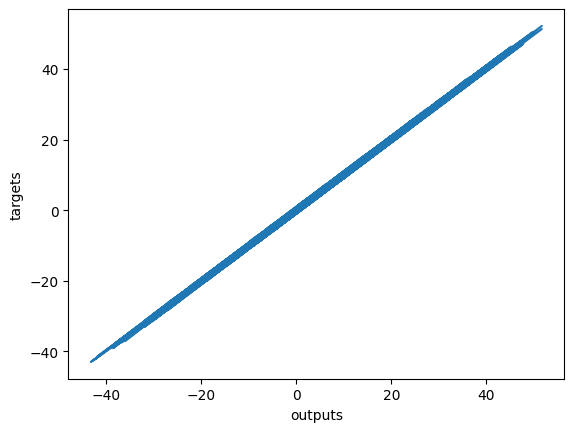

In [10]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

## Twicking with the optimizers (https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [12]:
input_size = 2 # x's and z's
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                  kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                                                   )
                            ])

# In the numPy Neural Network we set the learning rate to 0.02. The learning rate is the integral part of the optimizer.
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02) 

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 24.5676 - 450ms/epoch - 14ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2430 - 41ms/epoch - 1ms/step
Epoch 3/100
32/32 - 0s - loss: 0.4183 - 44ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 0.3839 - 44ms/epoch - 1ms/step
Epoch 5/100
32/32 - 0s - loss: 0.3938 - 46ms/epoch - 1ms/step
Epoch 6/100
32/32 - 0s - loss: 0.3658 - 43ms/epoch - 1ms/step
Epoch 7/100
32/32 - 0s - loss: 0.3719 - 39ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 0.3820 - 44ms/epoch - 1ms/step
Epoch 9/100
32/32 - 0s - loss: 0.3783 - 42ms/epoch - 1ms/step
Epoch 10/100
32/32 - 0s - loss: 0.3904 - 46ms/epoch - 1ms/step
Epoch 11/100
32/32 - 0s - loss: 0.3777 - 47ms/epoch - 1ms/step
Epoch 12/100
32/32 - 0s - loss: 0.3911 - 46ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s - loss: 0.4008 - 46ms/epoch - 1ms/step
Epoch 14/100
32/32 - 0s - loss: 0.4000 - 43ms/epoch - 1ms/step
Epoch 15/100
32/32 - 0s - loss: 0.3943 - 47ms/epoch - 1ms/step
Epoch 16/100
32/32 - 0s - loss: 0.3761 - 46ms/epoch - 1ms/ste

In [13]:
model.layers[0].get_weights()

[array([[ 2.0004213],
        [-3.0127225]], dtype=float32),
 array([4.9870796], dtype=float32)]

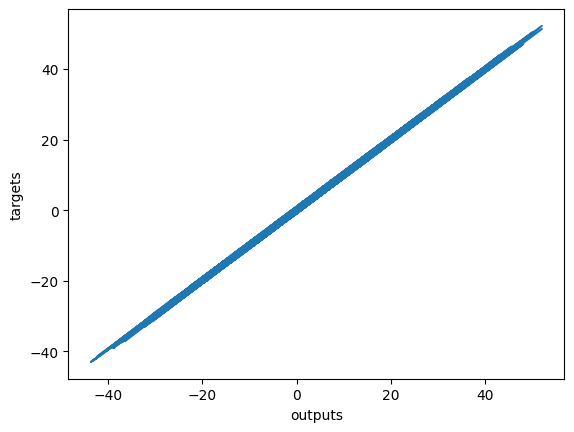

In [14]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()